<a href="https://colab.research.google.com/github/HRahman1777/Diabetes-Prediction-PMSCS-JU/blob/main/Diabetes_Prediction_PMSCS_JU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset From : [Kaggle - melikedilekci(diabetes-dataset-for-beginners)](https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners/)

# Importing All Necessary Packages/Library

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Imporint Raw Data From Google

In [126]:
from google.colab import drive
drive.mount('/content/gdrive')
raw_data = pd.read_csv('gdrive/My Drive/Data/notebook/diabetes/diabetes.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Checking And Clean If Needed

In [127]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
raw_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [129]:
raw_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization

In [130]:
corr_matrix = raw_data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

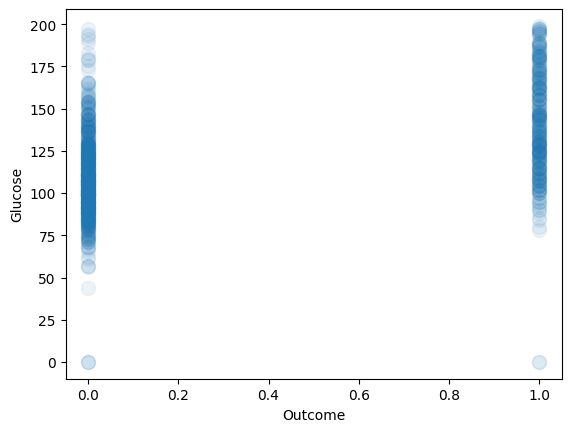

In [131]:
raw_data.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)
plt.show()

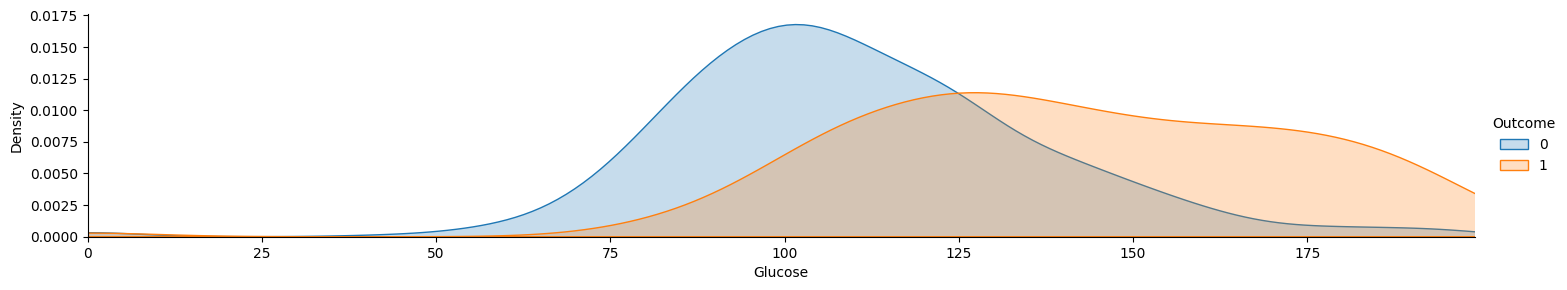

In [132]:
facet = sns.FacetGrid(raw_data, hue="Outcome",aspect=5)
facet.map(sns.kdeplot,'Glucose',fill= True)
facet.set(xlim=(0, raw_data['Glucose'].max()))
facet.add_legend()
plt.show()

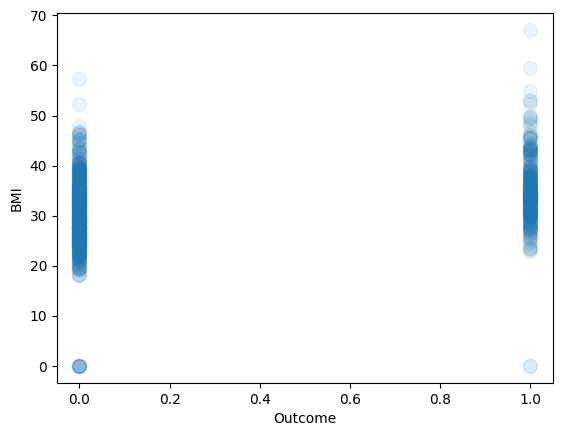

In [133]:
raw_data.plot(kind = 'scatter', x = 'Outcome',y = 'BMI',s = 100 ,alpha = 0.08)
plt.show()

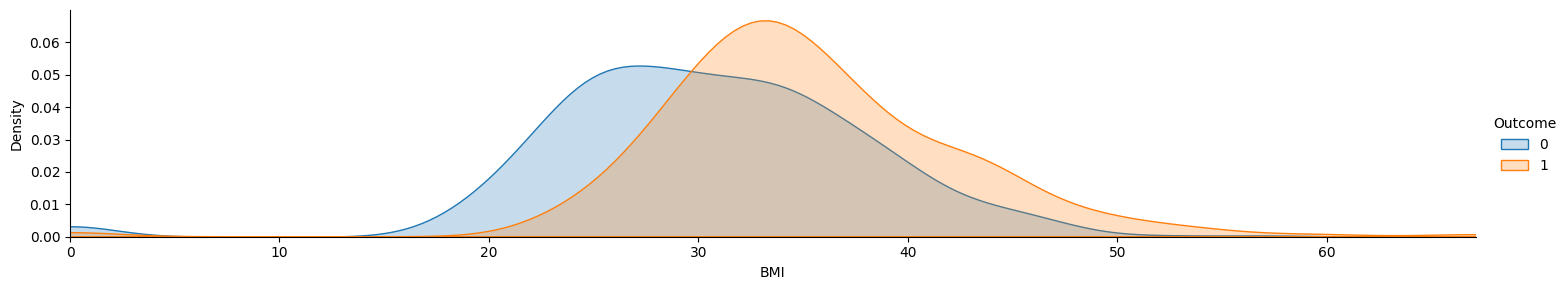

In [134]:
facet = sns.FacetGrid(raw_data, hue="Outcome",aspect=5)
facet.map(sns.kdeplot,'BMI',fill= True)
facet.set(xlim=(0, raw_data['BMI'].max()))
facet.add_legend()
plt.show()

# Data Preparing

In [135]:
data = raw_data

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)

train_df_labels = train_df["Outcome"].copy()
train_df= train_df.drop("Outcome", axis=1)

test_df.head(10)
#train_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

# Predictions

In [137]:
# Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

SGDClassifier(random_state=42)

In [138]:
prediction = sgd_clf.predict(train_prepared)
sgd_acc = sgd_clf.score(train_prepared, train_df_labels)
print("SGD Accuracy of Classifier: ", sgd_acc)

SGD Accuracy of Classifier:  0.6497829232995659


In [139]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_df_labels, prediction)
print(classification_report(train_df_labels, prediction))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       450
           1       0.50      0.49      0.49       241

    accuracy                           0.65       691
   macro avg       0.61      0.61      0.61       691
weighted avg       0.65      0.65      0.65       691



In [140]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [141]:
prediction = model.predict(train_prepared)
ld_acc = model.score(train_prepared, train_df_labels)
print("LR Accuracy of Classifier: ", ld_acc)

LR Accuracy of Classifier:  0.7756874095513748


In [142]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_df_labels, prediction)
print(classification_report(train_df_labels, prediction))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       450
           1       0.73      0.56      0.64       241

    accuracy                           0.78       691
   macro avg       0.76      0.73      0.74       691
weighted avg       0.77      0.78      0.77       691



In [143]:
# Support Vector Machine

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [144]:
svm_acc = poly_kernel_svm_clf.score(train_prepared, train_df_labels)
print("SVM Accuracy of Classifier: ", svm_acc)

SVM Accuracy of Classifier:  0.8451519536903039


In [145]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

In [146]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_df_labels, y_train_pred)
print(classification_report(train_df_labels, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       450
           1       0.64      0.55      0.59       241

    accuracy                           0.73       691
   macro avg       0.71      0.69      0.70       691
weighted avg       0.73      0.73      0.73       691



In [147]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_prepared, train_df_labels)
y_train_pred = kn.predict(train_prepared)

In [148]:
from sklearn.metrics import accuracy_score
kn_acc = accuracy_score(train_df_labels, y_train_pred)
print("KN Accuracy of Classifier: ", kn_acc)

KN Accuracy of Classifier:  0.8335745296671491


In [149]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_df_labels, y_train_pred)
print(classification_report(train_df_labels, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       450
           1       0.81      0.68      0.74       241

    accuracy                           0.83       691
   macro avg       0.83      0.80      0.81       691
weighted avg       0.83      0.83      0.83       691



# Result Preview

In [150]:
print("SGD Accuracy of Classifier: ", sgd_acc)
print("LR Accuracy of Classifier: ", ld_acc)
print("SVM Accuracy of Classifier: ", svm_acc)
print("KN Accuracy of Classifier: ", kn_acc)

SGD Accuracy of Classifier:  0.6497829232995659
LR Accuracy of Classifier:  0.7756874095513748
SVM Accuracy of Classifier:  0.8451519536903039
KN Accuracy of Classifier:  0.8335745296671491


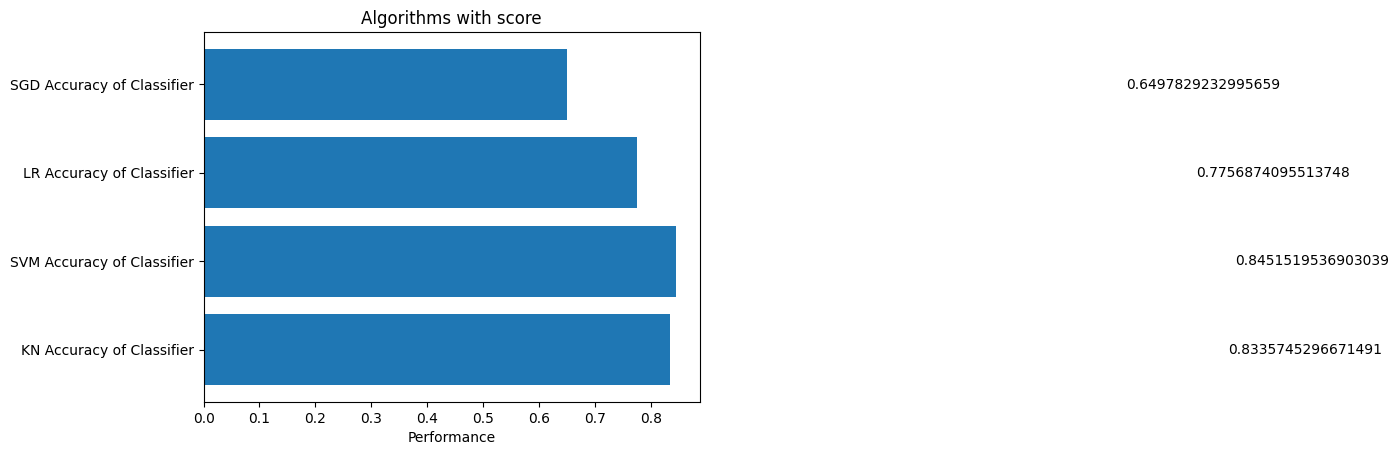

In [151]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('SGD Accuracy of Classifier', 'LR Accuracy of Classifier', 'SVM Accuracy of Classifier', 'KN Accuracy of Classifier')
y_pos = np.arange(len(algorithms))
x = (sgd_acc, ld_acc, svm_acc, kn_acc)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Algorithms with score')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()